In [2]:
import pandas as pd
import numpy as np

df  = pd.read_excel('SPRA04850_2017_2022.xlsx')


In [3]:
df.keys()
filtrado  = df[['Data Coleta','Parametro','Valor','Unidade']]
filtrado['Data Coleta'] = filtrado['Data Coleta'].astype('datetime64[ns]')
filtrado['Data Coleta'] = filtrado['Data Coleta'].dt.strftime('%y-%m')
filtrado.sort_values(by=['Data Coleta'], inplace=True)

/tmp/ipykernel_3633/2117963068.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  filtrado['Data Coleta'] = filtrado['Data Coleta'].astype('datetime64[ns]')
/tmp/ipykernel_3633/2117963068.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado['Data Coleta'] = filtrado['Data Coleta'].astype('datetime64[ns]')
/tmp/ipykernel_3633/2117963068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

indicadores

/tmp/ipykernel_3633/3302287105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph['Valor'] = ph['Valor'].str.replace(",",".").astype(float)
/tmp/ipykernel_3633/3302287105.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbo['Valor'] = dbo['Valor'].str.replace(",",".").astype(float)
/tmp/ipykernel_3633/3302287105.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

Text(0.5, 1.0, 'Temperatura do Ar')

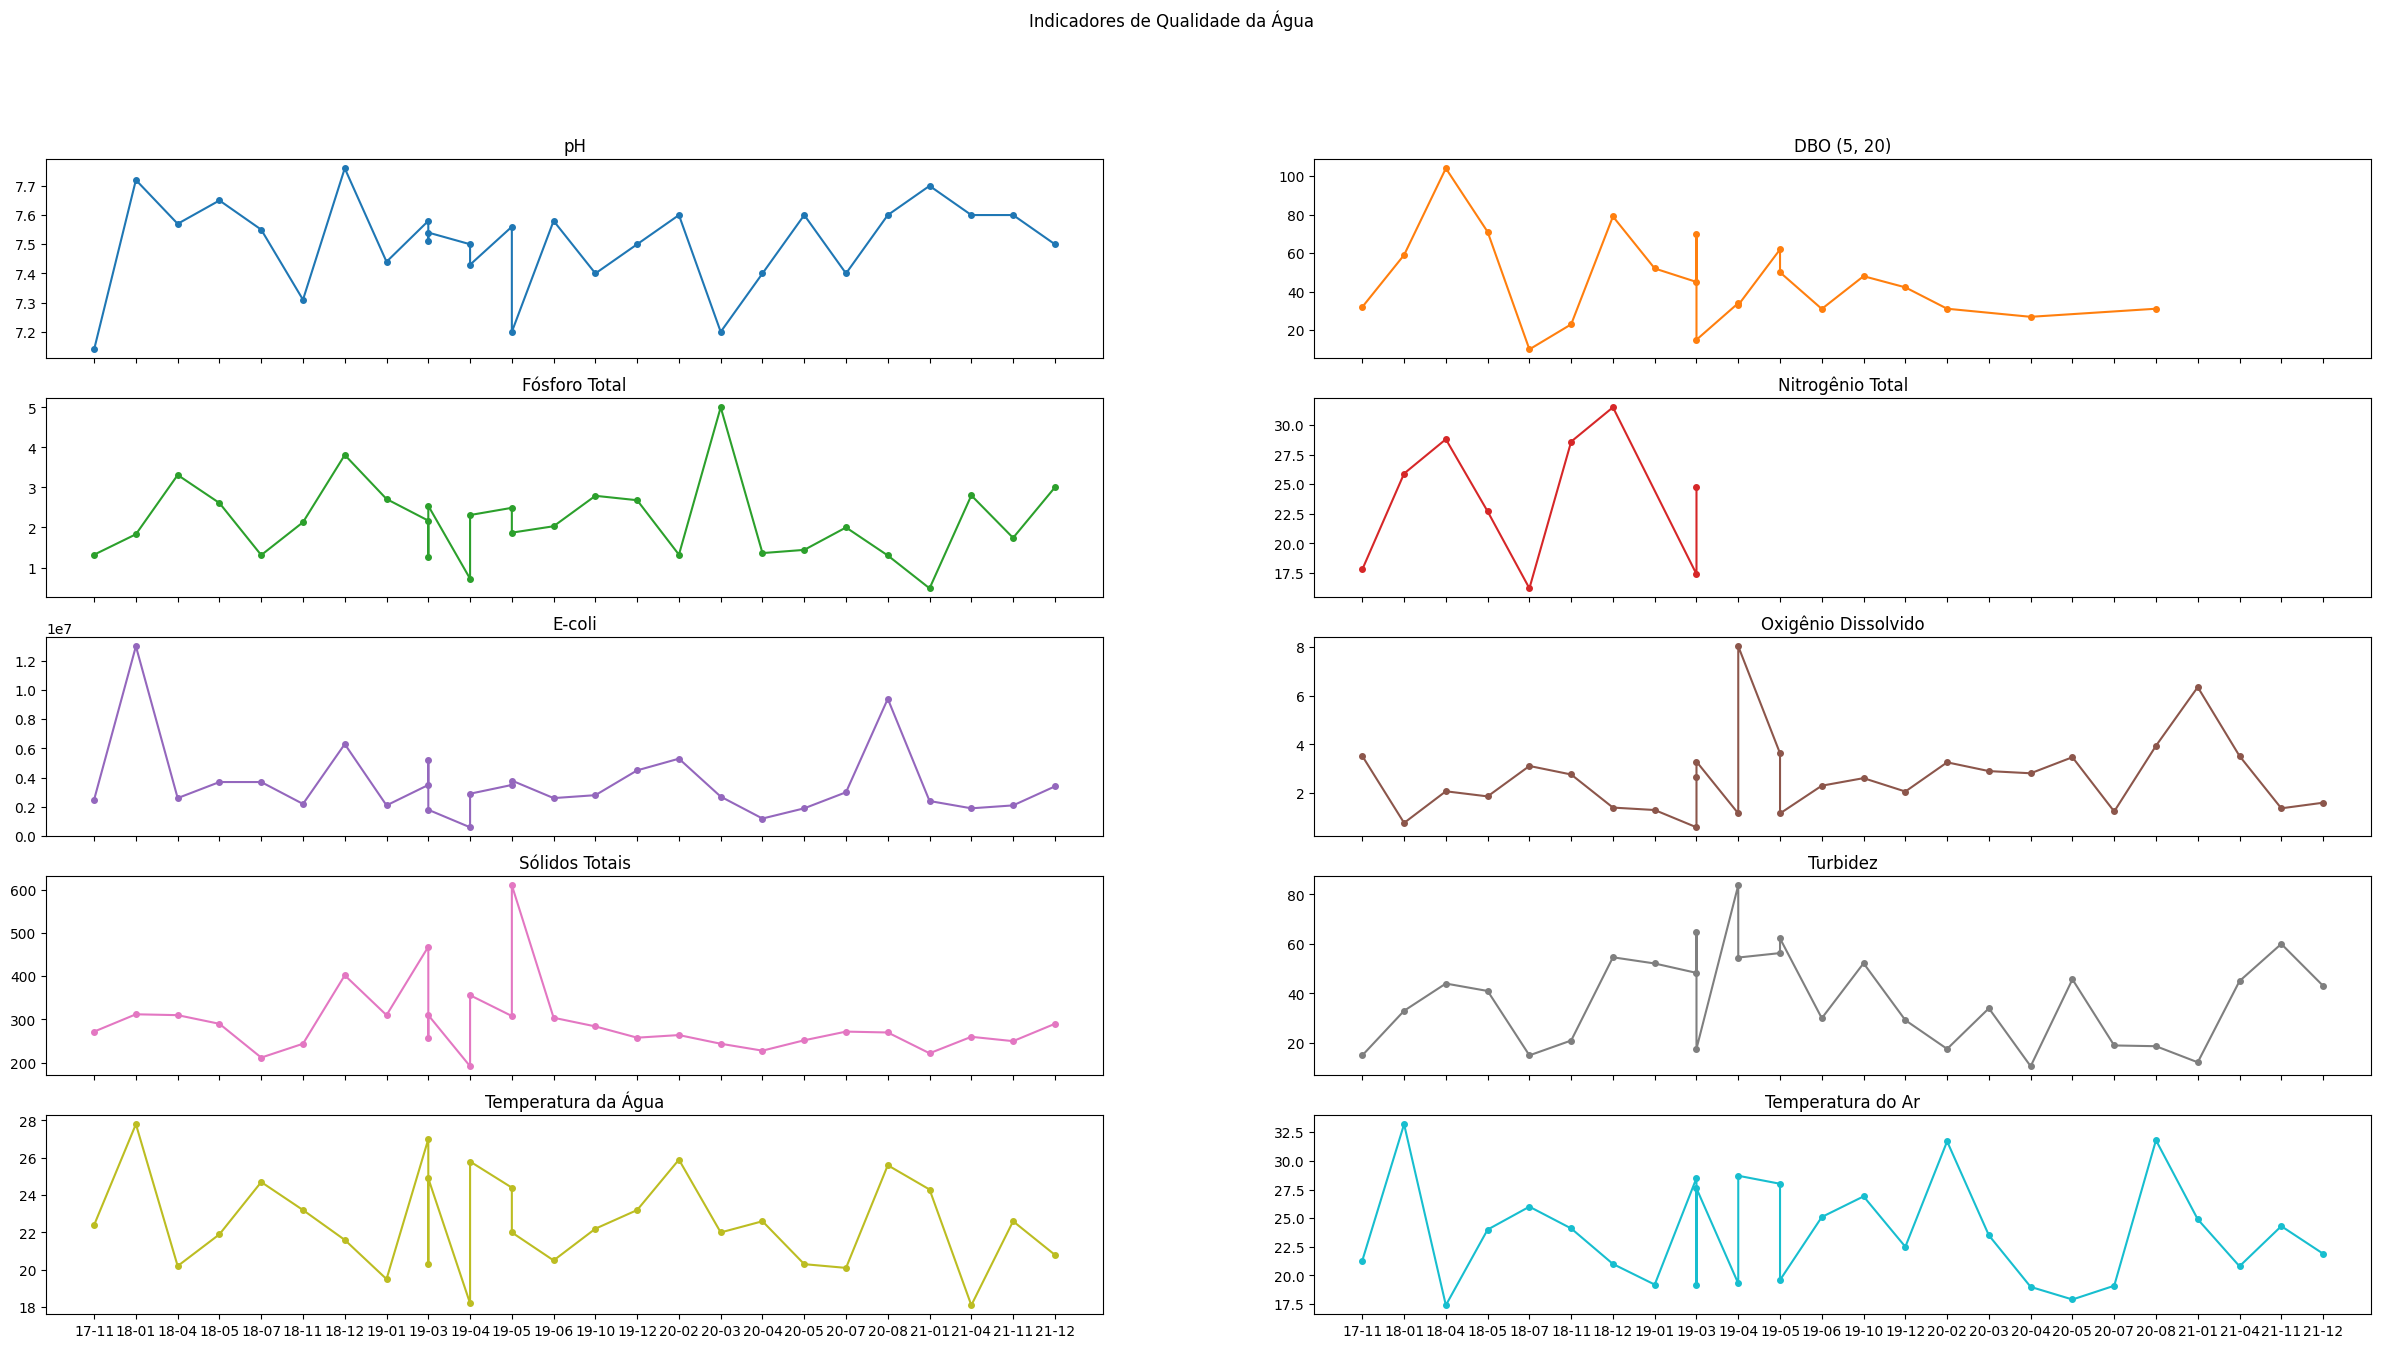

In [13]:
ph = filtrado.loc[filtrado['Parametro'] == 'pH']
ph['Valor'] = ph['Valor'].str.replace(",",".").astype(float)
dbo = filtrado.loc[filtrado['Parametro'] == 'DBO (5, 20)']
dbo['Valor'] = dbo['Valor'].str.replace(",",".").astype(float)
fosforo = filtrado.loc[filtrado['Parametro'] == 'Fósforo Total']
fosforo['Valor'] = fosforo['Valor'].str.replace(",",".").astype(float)
nitrogenio_t = filtrado.loc[filtrado['Parametro'] == 'Nitrogênio Total']
nitrogenio_t['Valor'] = nitrogenio_t['Valor'].str.replace(",",".").astype(float)

nitrogenio_k = filtrado.loc[filtrado['Parametro'] == 'Nitrogênio Kjeldah']
# nitrogenio_k['Valor'] = nitrogenio_t['Valor'].str.replace(",",".").astype(float)

nitrogenio_a = filtrado.loc[filtrado['Parametro'] == 'Nitrogênio amoniacal']
# nitrogenio_a['Valor'] = nitrogenio_t['Valor'].str.replace(",",".").astype(float)

nitrogenio_ni = filtrado.loc[filtrado['Parametro'] == 'Nitrogênio nitrito']
# nitrogenio_ni['Valor'] = nitrogenio_t['Valor'].str.replace(",",".").astype(float)

nitrogenio_na = filtrado.loc[filtrado['Parametro'] == 'Nitrogênio nitrato']
# nitrogenio_na['Valor'] = nitrogenio_t['Valor'].str.replace(",",".").astype(float)



coliformes = filtrado.loc[filtrado['Parametro'] == "Escherichia coli**"]
coliformes['Valor'] = coliformes['Valor'].str.replace(",",".").astype(float)
oxigenio = filtrado.loc[filtrado['Parametro'] == 'Oxigênio Dissolvido']
oxigenio['Valor'] = oxigenio['Valor'].str.replace(",",".").astype(float)
solidos = filtrado.loc[filtrado['Parametro'] == "Sólido Total"]
solidos['Valor'] = solidos['Valor'].str.replace(",",".").astype(float)
turbidez = filtrado.loc[filtrado['Parametro'] == 'Turbidez']
turbidez['Valor'] = turbidez['Valor'].str.replace(",",".").astype(float)
temperatura_agua = filtrado.loc[filtrado['Parametro'] == 'Temperatura da Água']
temperatura_agua['Valor'] = temperatura_agua['Valor'].str.replace(",",".").astype(float)
temperatura_ar = filtrado.loc[filtrado['Parametro'] == 'Temperatura do Ar']
temperatura_ar['Valor'] = temperatura_ar['Valor'].str.replace(",",".").astype(float)

#plot all indicators 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, axs = plt.subplots(5, 2, figsize=(30, 15), sharex=True)
fig.suptitle('Indicadores de Qualidade da Água')
axs[0, 0].plot(ph['Data Coleta'], ph['Valor'],marker='o',markersize=4)
axs[0, 0].set_title('pH')
axs[0, 1].plot(dbo['Data Coleta'], dbo['Valor'], 'tab:orange',marker='o',markersize=4)
axs[0, 1].set_title('DBO (5, 20)')
axs[1, 0].plot(fosforo['Data Coleta'], fosforo['Valor'], 'tab:green',marker='o',markersize=4)
axs[1, 0].set_title('Fósforo Total')
axs[1, 1].plot(nitrogenio_t['Data Coleta'], nitrogenio_t['Valor'], 'tab:red',marker='o',markersize=4)
axs[1, 1].set_title('Nitrogênio Total')
axs[2, 0].plot(coliformes['Data Coleta'], coliformes['Valor'], 'tab:purple',marker='o',markersize=4)
axs[2, 0].set_title('E-coli')
axs[2, 1].plot(oxigenio['Data Coleta'], oxigenio['Valor'], 'tab:brown',marker='o',markersize=4)
axs[2, 1].set_title('Oxigênio Dissolvido')
axs[3, 0].plot(solidos['Data Coleta'], solidos['Valor'], 'tab:pink',marker='o',markersize=4)
axs[3, 0].set_title('Sólidos Totais')
axs[3, 1].plot(turbidez['Data Coleta'], turbidez['Valor'], 'tab:gray',marker='o',markersize=4)
axs[3, 1].set_title('Turbidez')
axs[4, 0].plot(temperatura_agua['Data Coleta'], temperatura_agua['Valor'], 'tab:olive',marker='o',markersize=4)
axs[4, 0].set_title('Temperatura da Água')
axs[4, 1].plot(temperatura_ar['Data Coleta'], temperatura_ar['Valor'], 'tab:cyan',marker='o',markersize=4)
axs[4, 1].set_title('Temperatura do Ar')


In [5]:
filtrado['Parametro'].unique()

array(['pH', 'Carbono Orgânico Dissolvido', 'Bário Total', 'Potássio',
       'Etilbenzeno', 'Cádmio Total', 'Nitrogênio-Nitrito',
       'Nitrogênio-Nitrato', 'Arsênio Total', 'Nitrogênio Amoniacal',
       'Oxigênio Dissolvido', 'Zinco Total', 'DBO (5, 20)',
       'Fenóis Totais', 'Fluoreto Total', 'Sólido Dissolvido Total',
       'Sólido Total', 'Níquel Total', 'Dureza', 'Sódio',
       'Ferro Dissolvido', 'Alumínio Total', 'Ferro Total',
       'Fósforo Total', 'Sulfato Total', 'Manganês Total',
       'Cloreto Total', 'Cobre Total', 'Mercúrio Total', 'Tolueno',
       'Chumbo Total', 'Temperatura da Água', 'Nitrogênio Total',
       'Temperatura do Ar', 'Escherichia coli**',
       'Carbono Orgânico Total', 'Alumínio Dissolvido',
       'Cobre Dissolvido', 'Ens. Ecotoxic. c/ Vibrio fischeri',
       'Cálcio Total', 'Óleos e Graxas', 'Magnésio Total', 'Benzeno',
       'Estireno', 'Crômio Total', 'Coloração',
       'Subst. Tensoat. reagem c/ Azul Metileno',
       'Chuvas nas úl

In [14]:
nitrogenio_ni = filtrado.loc[filtrado['Parametro'] == 'Nitrogênio nitrito']
print(nitrogenio_ni)
print(nitrogenio_na)
print(nitrogenio_a)
print(nitrogenio_k)

Empty DataFrame
Columns: [Data Coleta, Parametro, Valor, Unidade]
Index: []
Empty DataFrame
Columns: [Data Coleta, Parametro, Valor, Unidade]
Index: []
Empty DataFrame
Columns: [Data Coleta, Parametro, Valor, Unidade]
Index: []
Empty DataFrame
Columns: [Data Coleta, Parametro, Valor, Unidade]
Index: []
